# GPR to predict the number of atoms
## input spectra, for predict Cu,Te seperately and predict them both 
## input 1st and/or 2nd derivative data to predict Cu,Te together
### summary: for individual predict, spectra better predict Te, derivate better predict Cu; If predict Cu and Te together, using first derivative data will give the best result. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('mu_cn10000.csv')
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.360022,5.084340,4.275681,0.030950,0.033483,0.035915,0.038363,0.040943,0.043770,0.046960,...,1.001789,1.003715,1.005820,1.008111,1.010590,1.013262,1.016131,1.019201,1.022478,1.025964
9996,9.758551,5.435938,4.322612,0.030927,0.033519,0.035994,0.038473,0.041074,0.043918,0.047124,...,1.000563,1.002288,1.004220,1.006344,1.008645,1.011110,1.013723,1.016471,1.019338,1.022312
9997,10.181228,6.181228,4.000000,0.030587,0.033143,0.035582,0.038020,0.040572,0.043356,0.046485,...,0.992527,0.996200,1.000256,1.004671,1.009423,1.014490,1.019850,1.025479,1.031355,1.037456
9998,10.156260,6.020380,4.135880,0.030699,0.033247,0.035682,0.038120,0.040676,0.043465,0.046604,...,0.994741,0.997739,1.001036,1.004613,1.008451,1.012532,1.016838,1.021350,1.026048,1.030916


use 500 random data to do the Machine Learning

In [7]:
df_test=df.sample(500)
df_test

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
1599,9.672197,5.175412,4.496785,0.030193,0.032622,0.034955,0.037301,0.039768,0.042464,0.045495,...,1.000162,1.000558,1.001147,1.001964,1.003045,1.004426,1.006143,1.008231,1.010727,1.013666
6086,9.893598,5.638899,4.254699,0.030650,0.033187,0.035615,0.038048,0.040601,0.043390,0.046531,...,0.999870,1.001784,1.003926,1.006302,1.008917,1.011777,1.014886,1.018252,1.021878,1.025771
8467,9.496587,5.142991,4.353597,0.030517,0.032992,0.035370,0.037760,0.040276,0.043028,0.046127,...,0.999605,1.000957,1.002491,1.004226,1.006187,1.008394,1.010869,1.013635,1.016713,1.020126
9072,9.198663,4.357410,4.841253,0.030389,0.032791,0.035110,0.037455,0.039933,0.042650,0.045714,...,1.012372,1.010299,1.008218,1.006190,1.004277,1.002538,1.001035,0.999828,0.998979,0.998548
9048,9.450178,4.944634,4.505544,0.030580,0.033061,0.035444,0.037841,0.040364,0.043127,0.046240,...,1.004813,1.004786,1.004848,1.005054,1.005457,1.006111,1.007068,1.008382,1.010107,1.012295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,9.482673,5.050461,4.432212,0.030907,0.033463,0.035911,0.038368,0.040952,0.043779,0.046969,...,1.003005,1.003825,1.004780,1.005878,1.007125,1.008527,1.010093,1.011828,1.013740,1.015836
9850,9.210759,4.907461,4.303298,0.030748,0.033229,0.035615,0.038020,0.040553,0.043328,0.046457,...,0.998226,0.999792,1.001548,1.003528,1.005763,1.008288,1.011136,1.014341,1.017935,1.021952
2494,9.422721,4.786593,4.636128,0.030620,0.033159,0.035586,0.038019,0.040573,0.043366,0.046514,...,1.011091,1.010112,1.009128,1.008192,1.007354,1.006667,1.006182,1.005949,1.006022,1.006450
2987,9.026112,4.695235,4.330876,0.031106,0.033648,0.036093,0.038557,0.041157,0.044009,0.047230,...,1.003713,1.005316,1.007069,1.008979,1.011051,1.013291,1.015705,1.018299,1.021080,1.024053


single output*(predict Num Cu)

In [8]:
from sklearn.model_selection import train_test_split
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


In [11]:

from sklearn.externals.six import StringIO
from sklearn.metrics import r2_score

/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [12]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [13]:
def RFRegression(max_depth, X_train, X_test, y_train, y_test, plot_min, plot_max):
    clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    clf = clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    MSE = ((y_pred-y_test)**2).mean()
    print("MSE = " , MSE)
    print('R-squared of training data is', clf.score(X_train, y_train))
    print('R-squared of testing data is' , clf.score(X_test, y_test))
    
    
    
    fig, axs = plt.subplots(1,1,figsize=(12,12))
    axs.scatter(clf.predict(X_test), y_test)
    axs.plot(np.linspace( plot_min, plot_max), np.linspace( plot_min, plot_max))
    axs.set_xlabel('Predicted_test')
    axs.set_ylabel('Actual_test')

    

MSE =  0.01651764115996697
R-squared of training data is 0.9919744307291767
R-squared of testing data is 0.9438570923805193


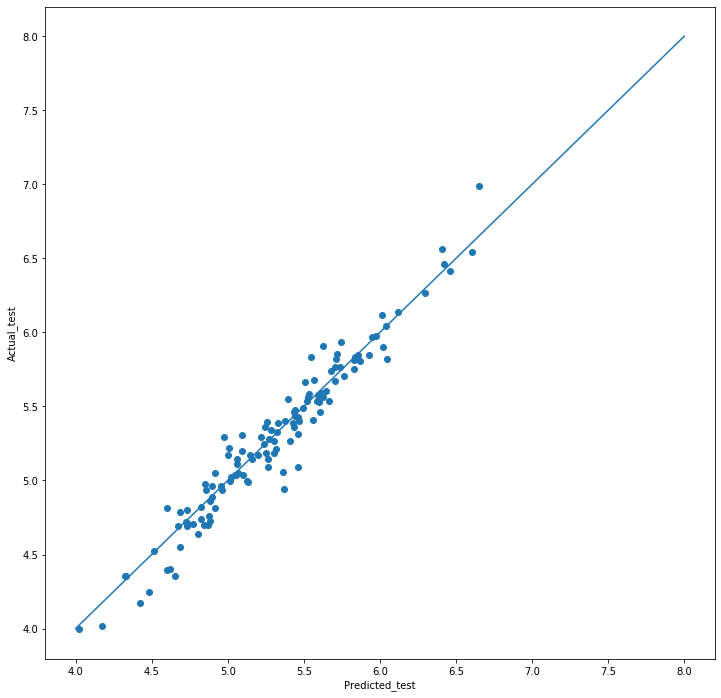

In [14]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# predict only Num of Te

In [15]:
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


In [16]:
min(df_test['Num Te'])

3.9999999999999987

In [17]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


MSE =  0.009600431752263326
R-squared of training data is 0.9919730561551199


/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

R-squared of testing data is 0.9429166972515288


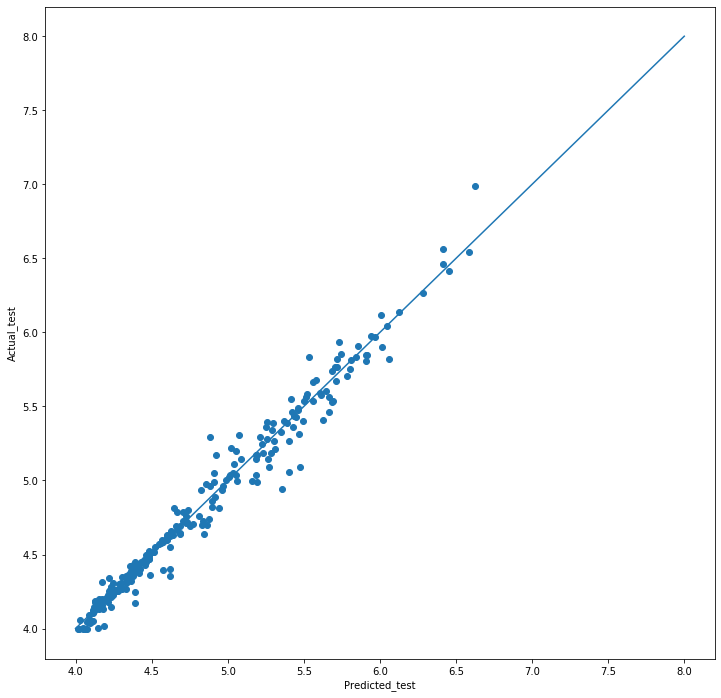

In [23]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# use spectra predict Num of Cu, Te as multi target regression

In [24]:
# Multi target regression
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 100)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125, 2)


MSE =  0.009600431752263326


/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

R-squared of training data is 0.9919730561551199
R-squared of testing data is 0.9429166972515288


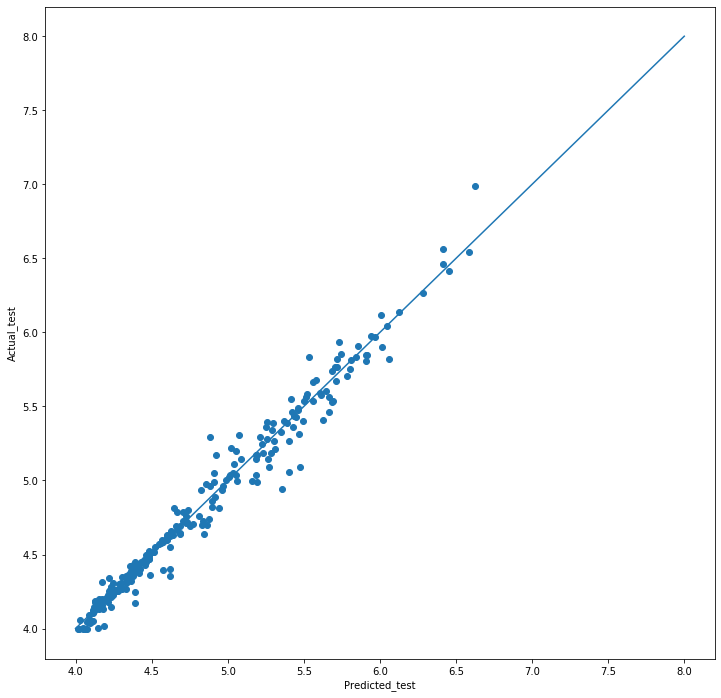

In [25]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

from the above, we can see that if we use multi target regression, the predicted values are still reasonable.
In the following, I am trying to use 1st and/or 2nd derivate to predict the number of atoms by multi target regression.

generate a derivate dataframe from the test dataframe.

In [26]:
import sys
sys.path.append('../PredictXANES')
import xanes_derivatives

In [27]:
dmu1, dmu2 = xanes_derivatives.xanes_derivatives(df_test)

In [28]:
# use first derivate only 
features=dmu1
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 99)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 99)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125, 2)


MSE =  0.016276669669594176
R-squared of training data is 0.9867296431242458


/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

R-squared of testing data is 0.9032203877427427


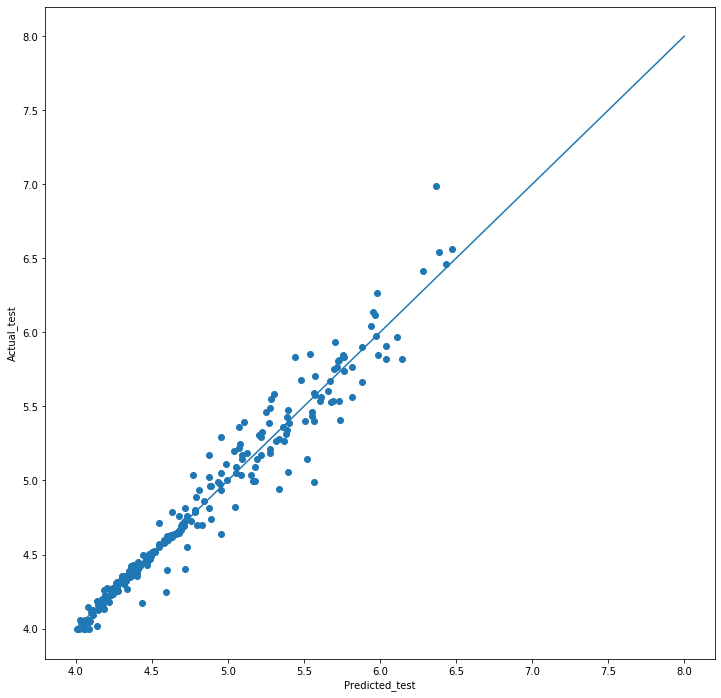

In [29]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

In [30]:
# use second derivate only 
features=dmu2
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 98)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125, 2)


MSE =  0.009405720082729017
R-squared of training data is 0.9925913775571557


/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

R-squared of testing data is 0.944074435306181


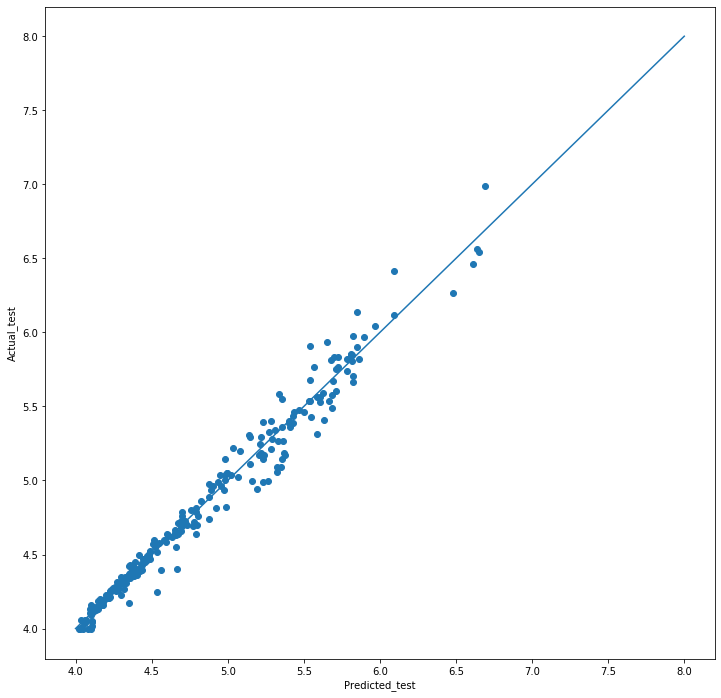

In [33]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# use first and second derivate together, multi target regressor implementing GPR

In [34]:
dmu_both = np.concatenate((dmu1,dmu2),axis=1)
print('The shape of first derivate is:', dmu1.shape)
print('The shape of second derivate is:', dmu2.shape)
print('The shape of the concatenate derivate is:', dmu_both.shape)

The shape of first derivate is: (500, 99)
The shape of second derivate is: (500, 98)
The shape of the concatenate derivate is: (500, 197)


In [35]:
# use first and second derivate together
features=dmu_both
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


The shape of our features is: (500, 197)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 197)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 197)
Testing Labels Shape: (125, 2)


MSE =  0.010125909612626632
R-squared of training data is 0.9926005304238814


/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/hsiaoyuhsien/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

R-squared of testing data is 0.9397922532093462


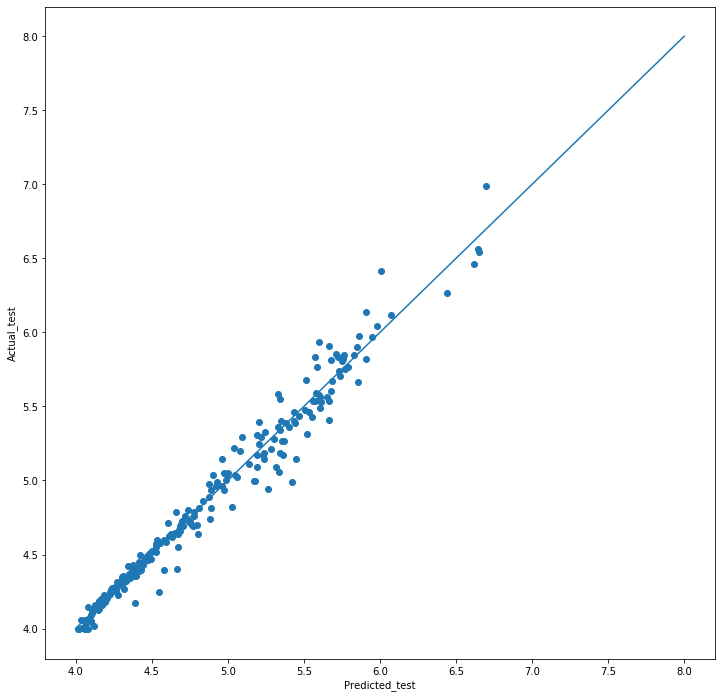

In [36]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# use first and/or derivative to predict num of Cu, Te seperatly 

In [37]:
# use first derivate to predict Cu 
features=dmu1
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)


MSE =  0.02973692754328555
R-squared of training data is 0.9854122639115278
R-squared of testing data is 0.8989251818839482


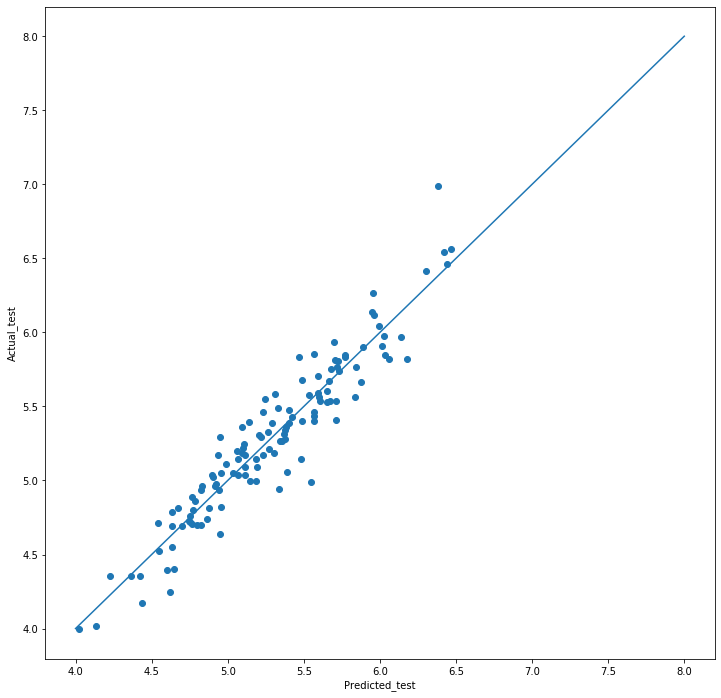

In [38]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

In [39]:
# use first derivate to predict Te
features=dmu1
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)


MSE =  0.00032681006226142006
R-squared of training data is 0.9993270093597788
R-squared of testing data is 0.9922480785366776


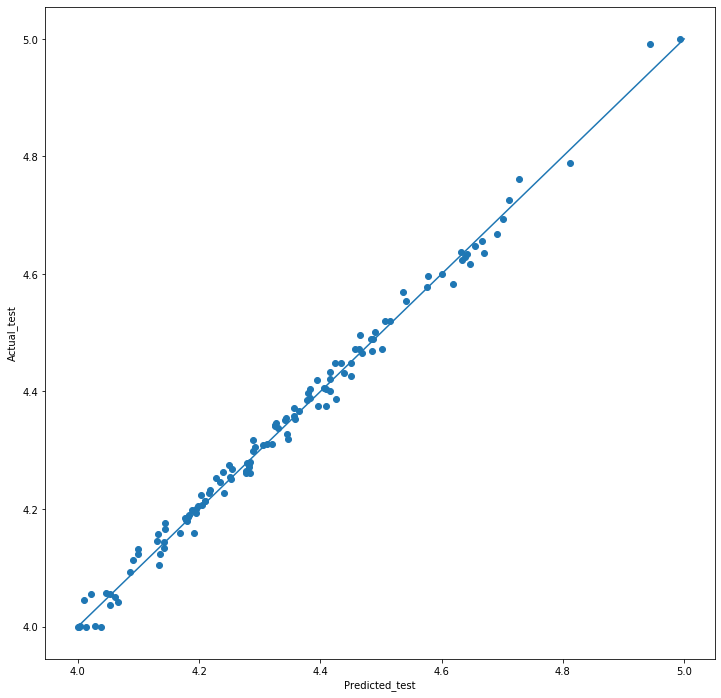

In [40]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 5)

# This result is pretty good!

# The follwing is using second derivate to predict Cu,Te seperately

In [41]:
# use second derivate to predict Cu
features=dmu2
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', trin_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500,)


NameError: name 'trin_features' is not defined

In [ ]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

In [ ]:
# use second derivate to predict Te
features=dmu2
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
RFRegression(10, train_features, test_features, train_labels,test_labels, 4, 5)

## Compared with spectra and first derivate, using second derivative data, both R2 for  Cu, Te are lower. Still the Cu has higher R2 compared with Te